In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dye=pd.read_csv("quantum yield prediction.csv")

In [3]:
dye


,solut_smile,solvent_SMILES,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,...,Col_2046.1,Col_2047.1,Et30,SP,SdP,SA,SB,Absorption/nm,Emission/nm,PLQY
0,C1(C2=NN(C3=CC=CC4=C3C=CC=C4)N=C2)=CC=CC=C1,CO,0,0,0,0,0,0,0,0,...,0,0,55.4,0.608,0.904,0.605,0.545,260.0,296.0,0.2700
1,O=C(C1=CC=CC=C1)C2=NN(C3=CC=CC=C3)N=C2C4=CC=CC=C4,CO,0,0,0,0,0,0,0,0,...,0,0,55.4,0.608,0.904,0.605,0.545,263.0,316.0,0.0200
2,C1(C2=NN(C3=NC=CC=C3)N=C2)=CC=CC=C1,CO,0,0,0,0,0,0,0,0,...,0,0,55.4,0.608,0.904,0.605,0.545,276.0,341.0,0.1500
3,FC(C=C1)=CC=C1C2=NN(C3=CC=C(F)C=C3)N=C2,CO,0,0,0,0,0,0,0,0,...,0,0,55.4,0.608,0.904,0.605,0.545,277.0,343.0,0.4000
4,O=C(OCC)C1=NN(N=C1C2=CC=CC=C2)C3=CC=C(N(C4=CC=...,C1CCOC1,0,0,0,0,0,0,0,0,...,0,0,37.4,0.714,0.634,0.000,0.591,277.0,449.0,0.9600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,C12=C(CCC3)C4=[N+]3CCCC4=CC1=CC(C5=C2)=C(C6=CC...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,40.7,0.761,0.769,0.040,0.178,880.0,921.0,0.0870
3062,COC1=CC=CC=C1C(C2=CC(C=C3C4=C5CCCN4CCC3)=C5C=C...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,40.7,0.761,0.769,0.040,0.178,880.0,919.0,0.0920
3063,CCC1=CC=CC=C1C(C2=CC(C=C3C4=C5CCCN4CCC3)=C5C=C...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,40.7,0.761,0.769,0.040,0.178,882.0,922.0,0.0920
3064,COCC1=CC=CC=C1C(C2=CC(C=C3C4=C5CCCN4CCC3)=C5C=...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,40.7,0.761,0.769,0.040,0.178,885.0,926.0,0.0760


In [4]:
# Calculate the evaluation parameters
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
def AllParameter(name="Hybrid", y_test=None , y_pred=None):
    mse = round(mean_squared_error(y_test, y_pred),4)
    mae = round(mean_absolute_error(y_test, y_pred),4)
    rmse = round(mean_squared_error(y_test, y_pred, squared=False),4)
    r2 = round(r2_score(y_test, y_pred),4)
    evs = round(explained_variance_score(y_test, y_pred),4)
    return name,mae,mse,rmse,evs,r2

In [5]:
# Scatter plot
def scatter_plot(name,y_test,y_pred):
    plt.scatter(y_test, y_pred)
    # Fit a straight line using coefficients
    coefficients = np.polyfit(y_test, y_pred, 1)
    line = np.polyval(coefficients, y_test)

    # Plot straight line
    plt.plot(y_test, line, color='r', label='Line of Coefficients')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(name)
    plt.legend()
    plt.show()




In [7]:
dye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Columns: 4106 entries, solut_smile to PLQY
dtypes: float64(8), int64(4096), object(2)
memory usage: 96.0+ MB


In [8]:
X = dye.iloc[:, 2 :4105].values
y = dye.iloc[:,4105].values

In [9]:
#for single model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=42)

('Ridge Regression', 0.15, 0.0401, 0.2004, 0.546, 0.5447)


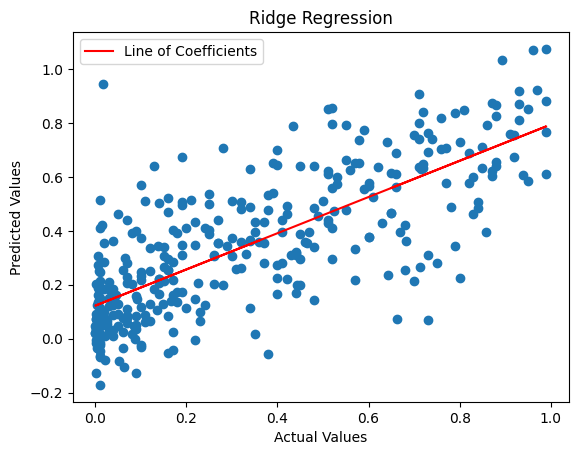

('Lasso Regression', 0.241, 0.0786, 0.2803, 0.1116, 0.1091)


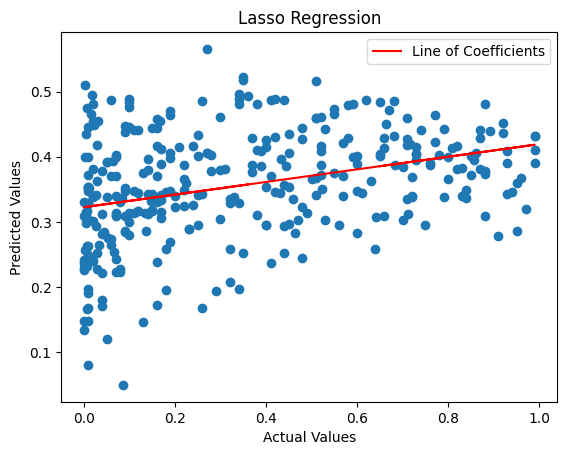

('Elastic Net Regression', 0.2386, 0.0777, 0.2788, 0.1209, 0.1184)


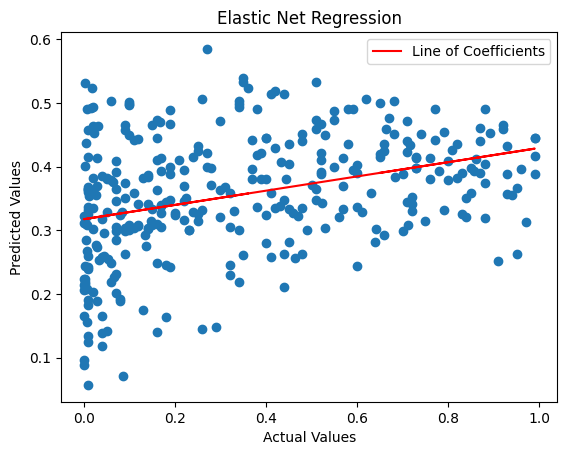

('Decision Tree Regression', 0.1296, 0.0459, 0.2143, 0.4804, 0.4794)


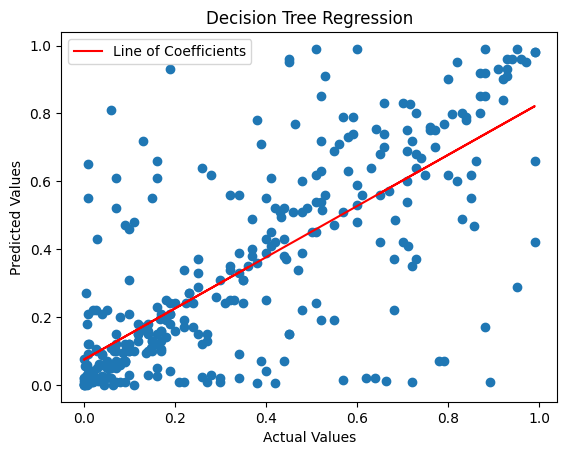

('Random Forest Regression', 0.1128, 0.0254, 0.1593, 0.7133, 0.7123)


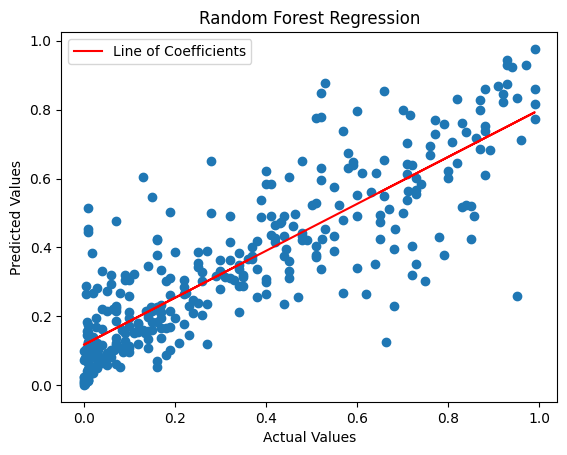

('Extra Trees Regression', 0.1042, 0.0238, 0.1543, 0.7301, 0.73)


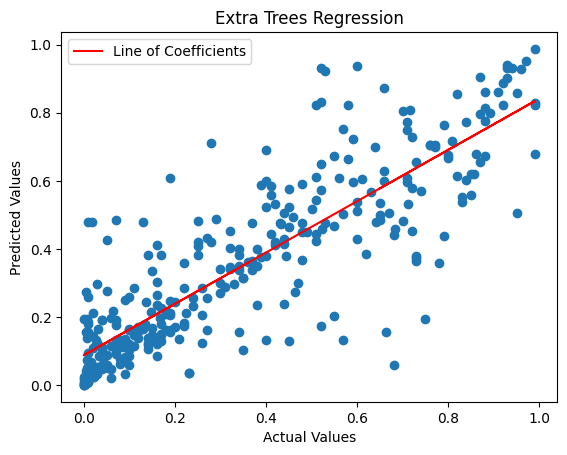

('AdaBoost Regression', 0.2355, 0.0726, 0.2694, 0.2244, 0.177)


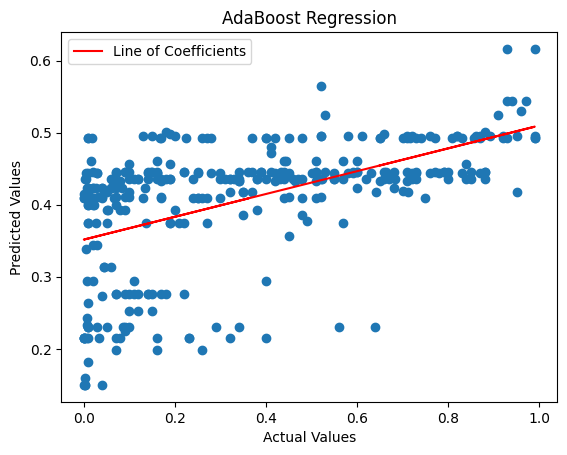

('Gradient Boosting Regression', 0.1638, 0.0394, 0.1986, 0.5543, 0.5528)


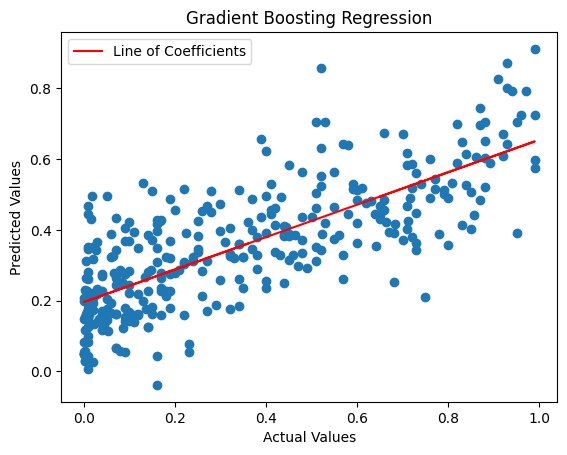

('XGBoost Regression', 0.1094, 0.0231, 0.1519, 0.7398, 0.7383)


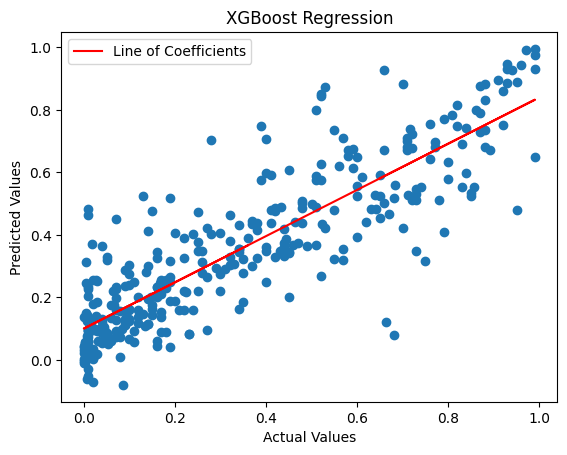

Learning rate set to 0.047978
0:	learn: 0.3051314	total: 242ms	remaining: 4m 2s
1:	learn: 0.3020270	total: 276ms	remaining: 2m 17s
2:	learn: 0.2988887	total: 305ms	remaining: 1m 41s
3:	learn: 0.2960337	total: 330ms	remaining: 1m 22s
4:	learn: 0.2935969	total: 353ms	remaining: 1m 10s
5:	learn: 0.2909455	total: 383ms	remaining: 1m 3s
6:	learn: 0.2882452	total: 408ms	remaining: 57.9s
7:	learn: 0.2862956	total: 433ms	remaining: 53.6s
8:	learn: 0.2841510	total: 459ms	remaining: 50.6s
9:	learn: 0.2822393	total: 479ms	remaining: 47.5s
10:	learn: 0.2797526	total: 511ms	remaining: 46s
11:	learn: 0.2776231	total: 536ms	remaining: 44.2s
12:	learn: 0.2759458	total: 568ms	remaining: 43.1s
13:	learn: 0.2740882	total: 594ms	remaining: 41.9s
14:	learn: 0.2722710	total: 614ms	remaining: 40.3s
15:	learn: 0.2706650	total: 646ms	remaining: 39.7s
16:	learn: 0.2688980	total: 671ms	remaining: 38.8s
17:	learn: 0.2673062	total: 697ms	remaining: 38s
18:	learn: 0.2659800	total: 717ms	remaining: 37s
19:	learn: 0.

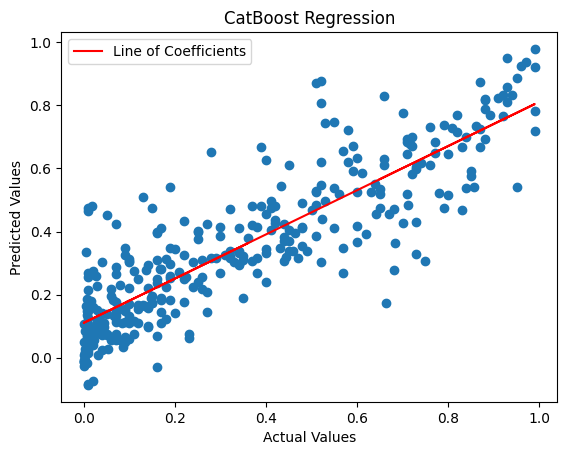

('LightGBM Regression', 0.1116, 0.024, 0.1549, 0.7291, 0.728)


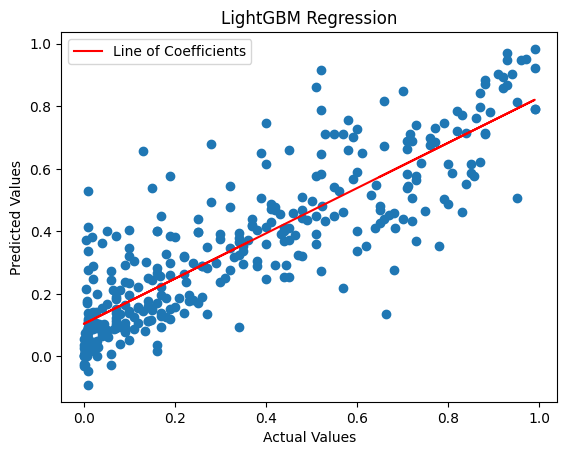

('KNeighbors Regression', 0.1748, 0.0576, 0.2399, 0.3479, 0.3471)


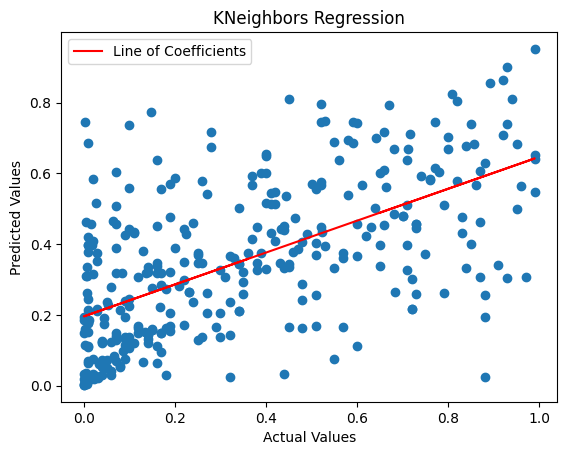

('MLP Regression', 0.1491, 0.0381, 0.1951, 0.5699, 0.5682)


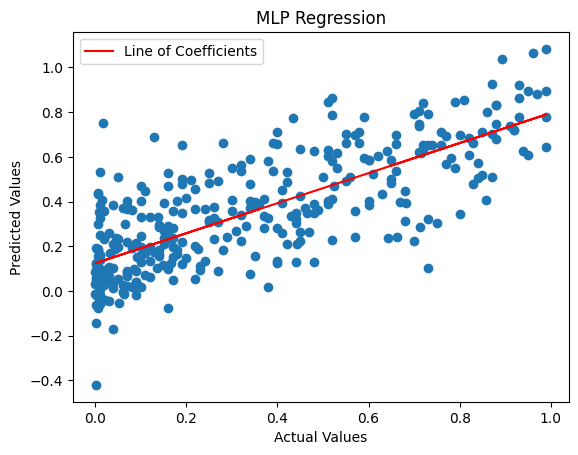

('Bayesian Ridge Regression', 0.1429, 0.0359, 0.1894, 0.5949, 0.5932)


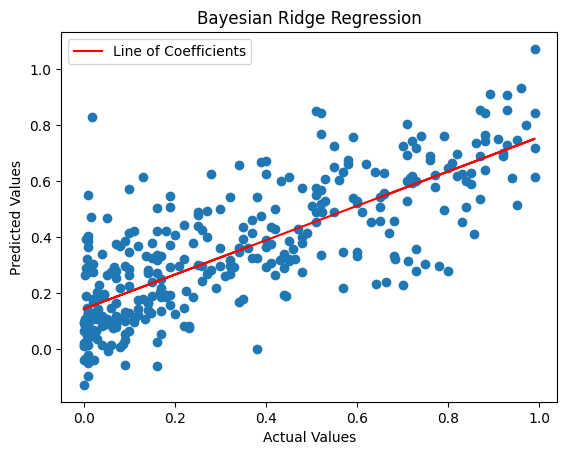

('ARD Regression', 0.1619, 0.0459, 0.2143, 0.4798, 0.4793)


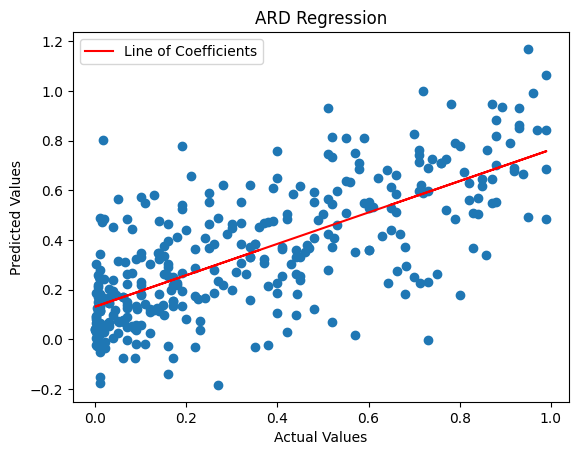

In [11]:
name_of_model=[]
mae=[]
mse=[]
rmse=[]
r2=[]
evs=[]

# Create a list of regression models
models = []
models.append(('Ridge Regression', Ridge()))
models.append(('Lasso Regression', Lasso()))
models.append(('Elastic Net Regression', ElasticNet()))
models.append(('Decision Tree Regression', DecisionTreeRegressor()))
models.append(('Random Forest Regression', RandomForestRegressor()))
models.append(('Extra Trees Regression', ExtraTreesRegressor()))
models.append(('AdaBoost Regression', AdaBoostRegressor()))
models.append(('Gradient Boosting Regression', GradientBoostingRegressor()))
models.append(('XGBoost Regression', XGBRegressor()))
models.append(('CatBoost Regression', CatBoostRegressor()))
models.append(('LightGBM Regression', LGBMRegressor()))
models.append(('KNeighbors Regression', KNeighborsRegressor()))
models.append(('MLP Regression', MLPRegressor()))
models.append(('Bayesian Ridge Regression', BayesianRidge()))
models.append(('ARD Regression', ARDRegression()))
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    k=AllParameter(name,y_test, y_pred)
    name_of_model.append(k[0])
    mae.append(k[1])
    mse.append(k[2])
    rmse.append(k[3])
    evs.append(k[4])
    r2.append(k[5])
   
    print(k)
    # graph(name,y_test, y_pred)
    scatter_plot(name,y_test, y_pred)



('Hybrid Model', 0.1024, 0.0229, 0.1514, 0.7409, 0.7401)


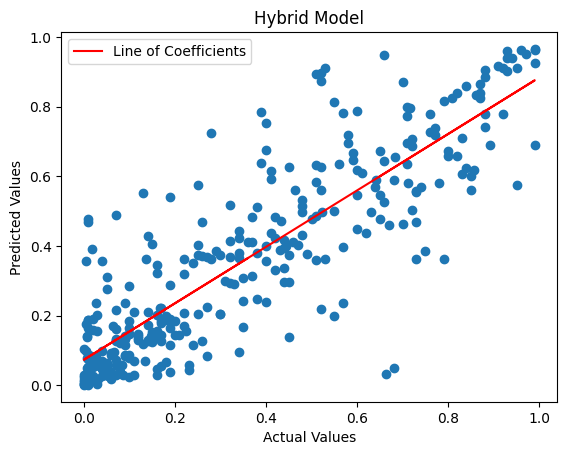

In [13]:
#  Train a XGBRegressor model
model1 = XGBRegressor()
model1.fit(X_train, y_train)

# Use the predictions of the XGBRegressor model as inputs for the LGBMRegressor
pred_model1 = model1.predict(X_train)
X_train_rf = np.column_stack((X_train, pred_model1))
model2 = LGBMRegressor()
model2.fit(X_train_rf, y_train)

# Evaluate the sequential hybrid model
pred_model1_test = model1.predict(X_test)
X_test_rf = np.column_stack((X_test, pred_model1_test))
predictions = model2.predict(X_test_rf)

print(AllParameter('Hybrid Model', y_test, predictions))

scatter_plot('Hybrid Model',y_test, predictions)

